In [27]:
import sys
sys.path.append('../src')
from gow.utilities import load_human_action_dataset, load_ucr_dataset, run_knn
from gow import gow_sinkhorn_autoscale_fixed
from ot import dist
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Get Human Actions train and test sets
X_train, y_train, X_test, y_test = load_human_action_dataset("../data/Human_Actions", "MSRAction3D")
seq1 = X_test[20]
seq2 = X_train[7]

# Compute the initial cost matrix
D = dist(seq1, seq2)
D = D / D.max()

# Get the distance along with transport matrix and weight vector
distance, T, weight_vector = gow_sinkhorn_autoscale_fixed([], [], D, show_details=True)

Successfully loaded dataset: MSRAction3D
Size of train data: 270
Size of test data: 297


<Axes: >

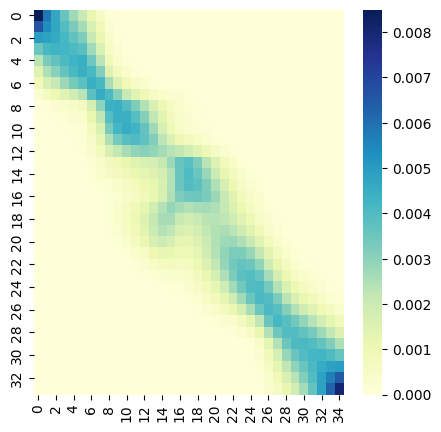

In [21]:
# Plot transport matrix T
plt.figure(figsize=(5,5))
sns.heatmap(T, cmap="YlGnBu", annot=None)

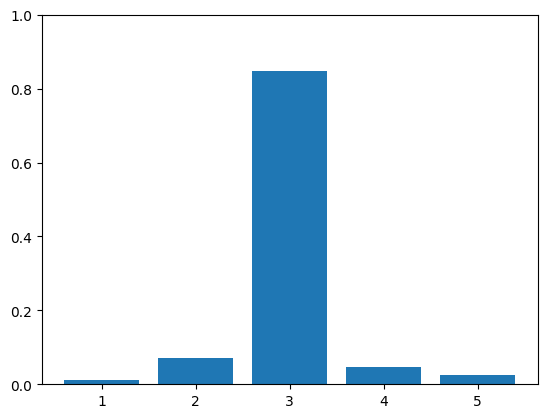

In [31]:
# Plot weights for each function
w_flat = weight_vector.flatten()
func_num = len(w_flat)
x_axis = np.arange(func_num) + 1
plt.ylim([0, 1])
plt.bar(x_axis,w_flat, align='center') 
plt.xticks(x_axis)
plt.show()